In [7]:
import pandas as pd

# Read the files and import all rows.
df_18 = pd.read_csv('delays_2018.csv')
df_19 = pd.read_csv('delays_2019.csv')

# Concatenate the 2018 and 2019 data into a single DataFrame.
df = pd.concat([df_18, df_19],
               ignore_index=True)

# Print out the number of rows imported from the files.
print('Number of Rows: ' + str(len(df_18) + len(df_19)))

Number of Rows: 41177


In [13]:
# Change the data type of the 'month' column to date and change the format to YYYY-M (e.g. 2018-1).
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m').dt.strftime('%Y-%m')
# Remove rows containing invalid data.
df = df[(df['date'] >= '2018-01') & (df['date'] <= '2019-12') & (df['arr_flights'].notnull())
              & (df['carrier'].notnull()) & (df['carrier_name'].notnull()) 
              & (df['airport'].notnull()) & (df['airport_name'].notnull())]
# Print out the number of rows remaining in the dataset.
print('Number of Rows: ' + str(len(df)))

Number of Rows: 41077


In [14]:
# Identify the airports in the state of Tennessee.
df['TN'] = df['airport_name'].apply(lambda x: x.find('TN'))
# Create a set of airport names (to eliminate the duplicates).
airports = set(df[df['TN'] != -1]['airport_name'])
# Display the list of airports.
print('Tennessee Airports:')
print(airports)

Tennessee Airports:
{'Knoxville, TN: McGhee Tyson', 'Bristol/Johnson City/Kingsport, TN: Tri Cities', 'Memphis, TN: Memphis International', 'Nashville, TN: Nashville International', 'Chattanooga, TN: Lovell Field'}


In [15]:
# Read the coordinates file and import all rows.
df_coords = pd.read_csv('airport_coordinates.csv')

# Create a new DataFrame with airport codes and names.
df_airports = df[['airport', 'airport_name']].drop_duplicates().reset_index(drop=True)

# Merge the coordinates DataFrame with the airports DataFrame.
df_airports = pd.merge(df_airports, df_coords, on='airport')

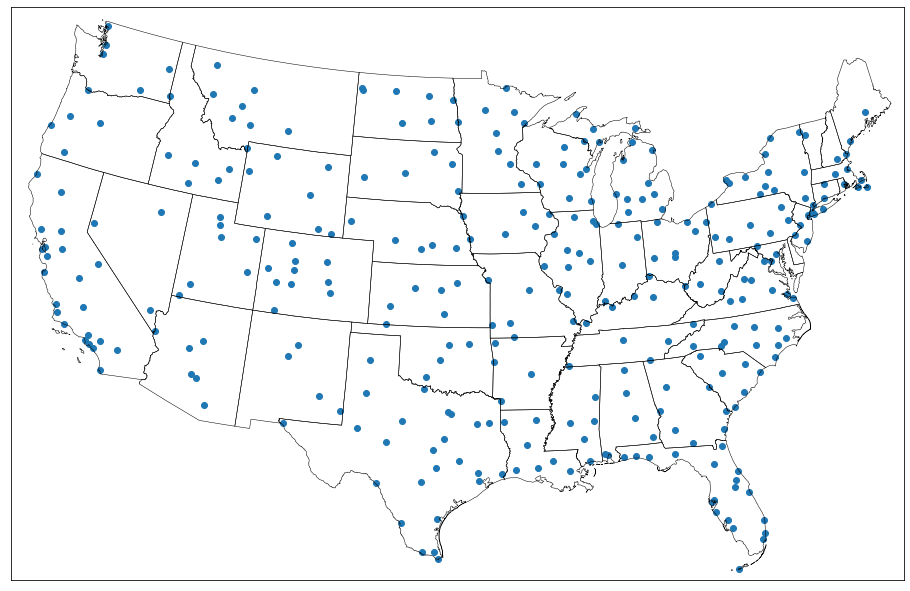

In [26]:
# This code was required due to an Anaconda issue.  You may not need it depending on your environment.
import os
os.environ["PROJ_LIB"] = "C:\\Users\\HM358WJ\\anaconda3\\envs\\pjt2\\Library\\share\\basemap";
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Ready the Basemap for display.
fig = plt.figure(figsize=(16, 16))
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=32,lat_2=45,lon_0=-95)

# Load the shapefile to display the outlines of the US states.
m.readshapefile('st99_d00', name='states', drawbounds=True)

# Plot the airports on the map.
m.scatter(df_airports['long'].values, df_airports['lat'].values, latlon=True)
plt.show()

In [27]:
# Use crosstab to display the number of diverted flights for each carrier-airport pair, without null values.
pd.crosstab(df['carrier'], df['airport'], values=df['arr_diverted'], aggfunc='sum').fillna('')

airport,ABE,ABI,ABQ,ABR,ABY,ACK,ACT,ACV,ACY,ADK,...,VEL,VLD,VPS,WRG,WYS,XNA,XWA,YAK,YNG,YUM
carrier,,,,,,,,,,,,,,,,,,,,,
9E,1.0,,,,3.0,3.0,,,,,...,,2.0,1.0,,,10.0,,,,
AA,,,8.0,,,,,,,,...,,,10.0,,,1.0,,,,
AS,,,0.0,,,,,,,0.0,...,,,,9.0,,,,23.0,,
B6,,,2.0,,,11.0,,,,,...,,,,,,,,,,
DL,3.0,,0.0,,,,,,,,...,,,9.0,,,3.0,,,,
EV,5.0,,3.0,,,,,,,,...,,,7.0,,,9.0,,,,
F9,,,0.0,,,,,,,,...,,,,,,0.0,,,,
G4,9.0,,0.0,,,,,,,,...,,,5.0,,,2.0,,,0.0,
HA,,,,,,,,,,,...,,,,,,,,,,


In [28]:
# Subset DataFrame for planes arriving into JFK in 2019 with values in both the carrier_ct and weather_ct columns.
df_f = df[(df['date'] >= '2019-01') & (df['date'] <= '2019-12') & (df['airport'] == 'JFK') 
          & (df['carrier_ct'] > 0) & (df['weather_ct'] > 0)]

# Add together the sums of the two columns to obtain the total number of delays.

print("Number of Delays: " + str(df_f['carrier_ct'].sum()  + df_f['weather_ct'].sum()))

Number of Delays: 6919.429999999999


In [29]:
# Create a DataFrame containing airline names, total arriving flights and number of cancelled flights.
df_flights = df.groupby('carrier_name')['arr_flights'].sum().reset_index(name='num_arrived')
df_cancelled = df.groupby('carrier_name')['arr_cancelled'].sum().reset_index(name='num_cancelled')
df_cancelled = pd.merge(df_cancelled, df_flights, on='carrier_name')

# Calculate the percentage of flights cancelled.
df_cancelled['proportion'] = df_cancelled['num_cancelled'] / df_cancelled['num_arrived'] * 100

# Display the airline with the most cancellations as a percentage of total arriving flights.
df_cancelled.sort_values(by=['proportion'], ascending=False).head(1)

,carrier_name,num_cancelled,num_arrived,proportion
7,ExpressJet Airlines LLC,4163.0,97099.0,4.287377


In [30]:
# Calculate the average number of delays per airport.
avg_delays = df.groupby('airport')['arr_del15'].sum().mean()

# Display average number of delays per airport.
print('Average Number of Delays per Airport: ' + str(avg_delays))

Average Number of Delays per Airport: 7544.997245179064


In [31]:
df.groupby('carrier')['arr_del15'].sum().nsmallest(3).reset_index(name='num_delays')


,carrier,num_delays
0,VX,3440.0
1,HA,18207.0
2,G4,42725.0


In [32]:
airline = input("What airline (9E, AA, AS, B6, DL, EV, F9, G4, HA, MQ, NK, OH, OO, UA, VX, WN, YV, YX)? ")


What airline (9E, AA, AS, B6, DL, EV, F9, G4, HA, MQ, NK, OH, OO, UA, VX, WN, YV, YX)? EV


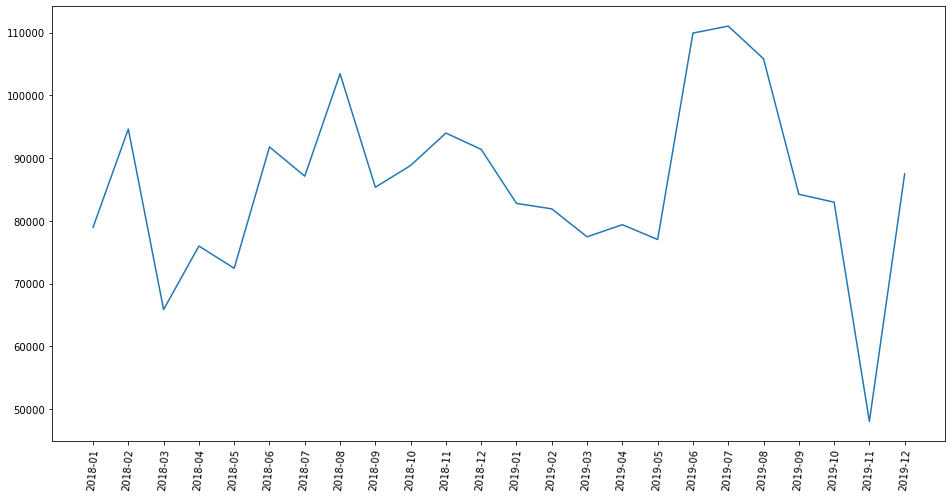

In [33]:
# Subset for carrier selected by user and rows with a NAS delay.
df_nas = df[(df['carrier'] == airline) & (df['nas_delay'] > 0)]

# Determine total number of NAS delay minutes by month.
df_nas = df_nas.groupby('date')['nas_delay'].sum()

# Plot NAS delay minutes by month for selected airline.
plt.figure(figsize=(16, 8))
plt.plot(df_nas)
plt.xticks(rotation=85)
plt.show()

In [34]:

# Display whether total NAS delay minutes are increasing or decreasing for past 2 months.
if df_nas.iloc[-1] > df_nas.iloc[-2]:
    print('Total NAS delay minutes for ' + airline + ' are increasing.')
else:
    print('Total NAS delay minutes for ' + airline + ' are decreasing.')

Total NAS delay minutes for EV are increasing.
